In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer 
from sklearn.compose import make_column_selector
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
satellite = pd.read_csv('Satellite.csv', sep= ";")
satellite.head(2)

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,...,x.28,x.29,x.30,x.31,x.32,x.33,x.34,x.35,x.36,classes
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,grey soil
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,grey soil


In [3]:
y= satellite['classes']
X= satellite.drop('classes', axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=24,test_size=0.3,stratify=y)

In [4]:
satellite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 37 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   x.1      6435 non-null   int64 
 1   x.2      6435 non-null   int64 
 2   x.3      6435 non-null   int64 
 3   x.4      6435 non-null   int64 
 4   x.5      6435 non-null   int64 
 5   x.6      6435 non-null   int64 
 6   x.7      6435 non-null   int64 
 7   x.8      6435 non-null   int64 
 8   x.9      6435 non-null   int64 
 9   x.10     6435 non-null   int64 
 10  x.11     6435 non-null   int64 
 11  x.12     6435 non-null   int64 
 12  x.13     6435 non-null   int64 
 13  x.14     6435 non-null   int64 
 14  x.15     6435 non-null   int64 
 15  x.16     6435 non-null   int64 
 16  x.17     6435 non-null   int64 
 17  x.18     6435 non-null   int64 
 18  x.19     6435 non-null   int64 
 19  x.20     6435 non-null   int64 
 20  x.21     6435 non-null   int64 
 21  x.22     6435 non-null   int64 
 22  

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x.1     6435 non-null   int64
 1   x.2     6435 non-null   int64
 2   x.3     6435 non-null   int64
 3   x.4     6435 non-null   int64
 4   x.5     6435 non-null   int64
 5   x.6     6435 non-null   int64
 6   x.7     6435 non-null   int64
 7   x.8     6435 non-null   int64
 8   x.9     6435 non-null   int64
 9   x.10    6435 non-null   int64
 10  x.11    6435 non-null   int64
 11  x.12    6435 non-null   int64
 12  x.13    6435 non-null   int64
 13  x.14    6435 non-null   int64
 14  x.15    6435 non-null   int64
 15  x.16    6435 non-null   int64
 16  x.17    6435 non-null   int64
 17  x.18    6435 non-null   int64
 18  x.19    6435 non-null   int64
 19  x.20    6435 non-null   int64
 20  x.21    6435 non-null   int64
 21  x.22    6435 non-null   int64
 22  x.23    6435 non-null   int64
 23  x.24    6435 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=24, test_size=0.3, stratify=y)

In [14]:
dtc = DecisionTreeClassifier(random_state=24)
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
params = {'min_samples_split':[2,10,25,50], 'min_samples_leaf':[1,10,25,50],'max_depth':[None,4,6]}
gcv = GridSearchCV(dtc,param_grid=params,cv=kfold,scoring='neg_log_loss',verbose=3)
gcv.fit(X,y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-5.349 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-4.817 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-5.573 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-5.265 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-5.293 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=-3.915 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=-3.512 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=-4.375 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=-4.050 total time=   0.0s
[CV 5/5

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'max_depth': [None, 4, 6],
                         'min_samples_leaf': [1, 10, 25, 50],
                         'min_samples_split': [2, 10, 25, 50]},
             scoring='neg_log_loss', verbose=3)

In [15]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 2}
-0.6679631827034694


In [17]:
best_tree = gcv.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, random_state=24)

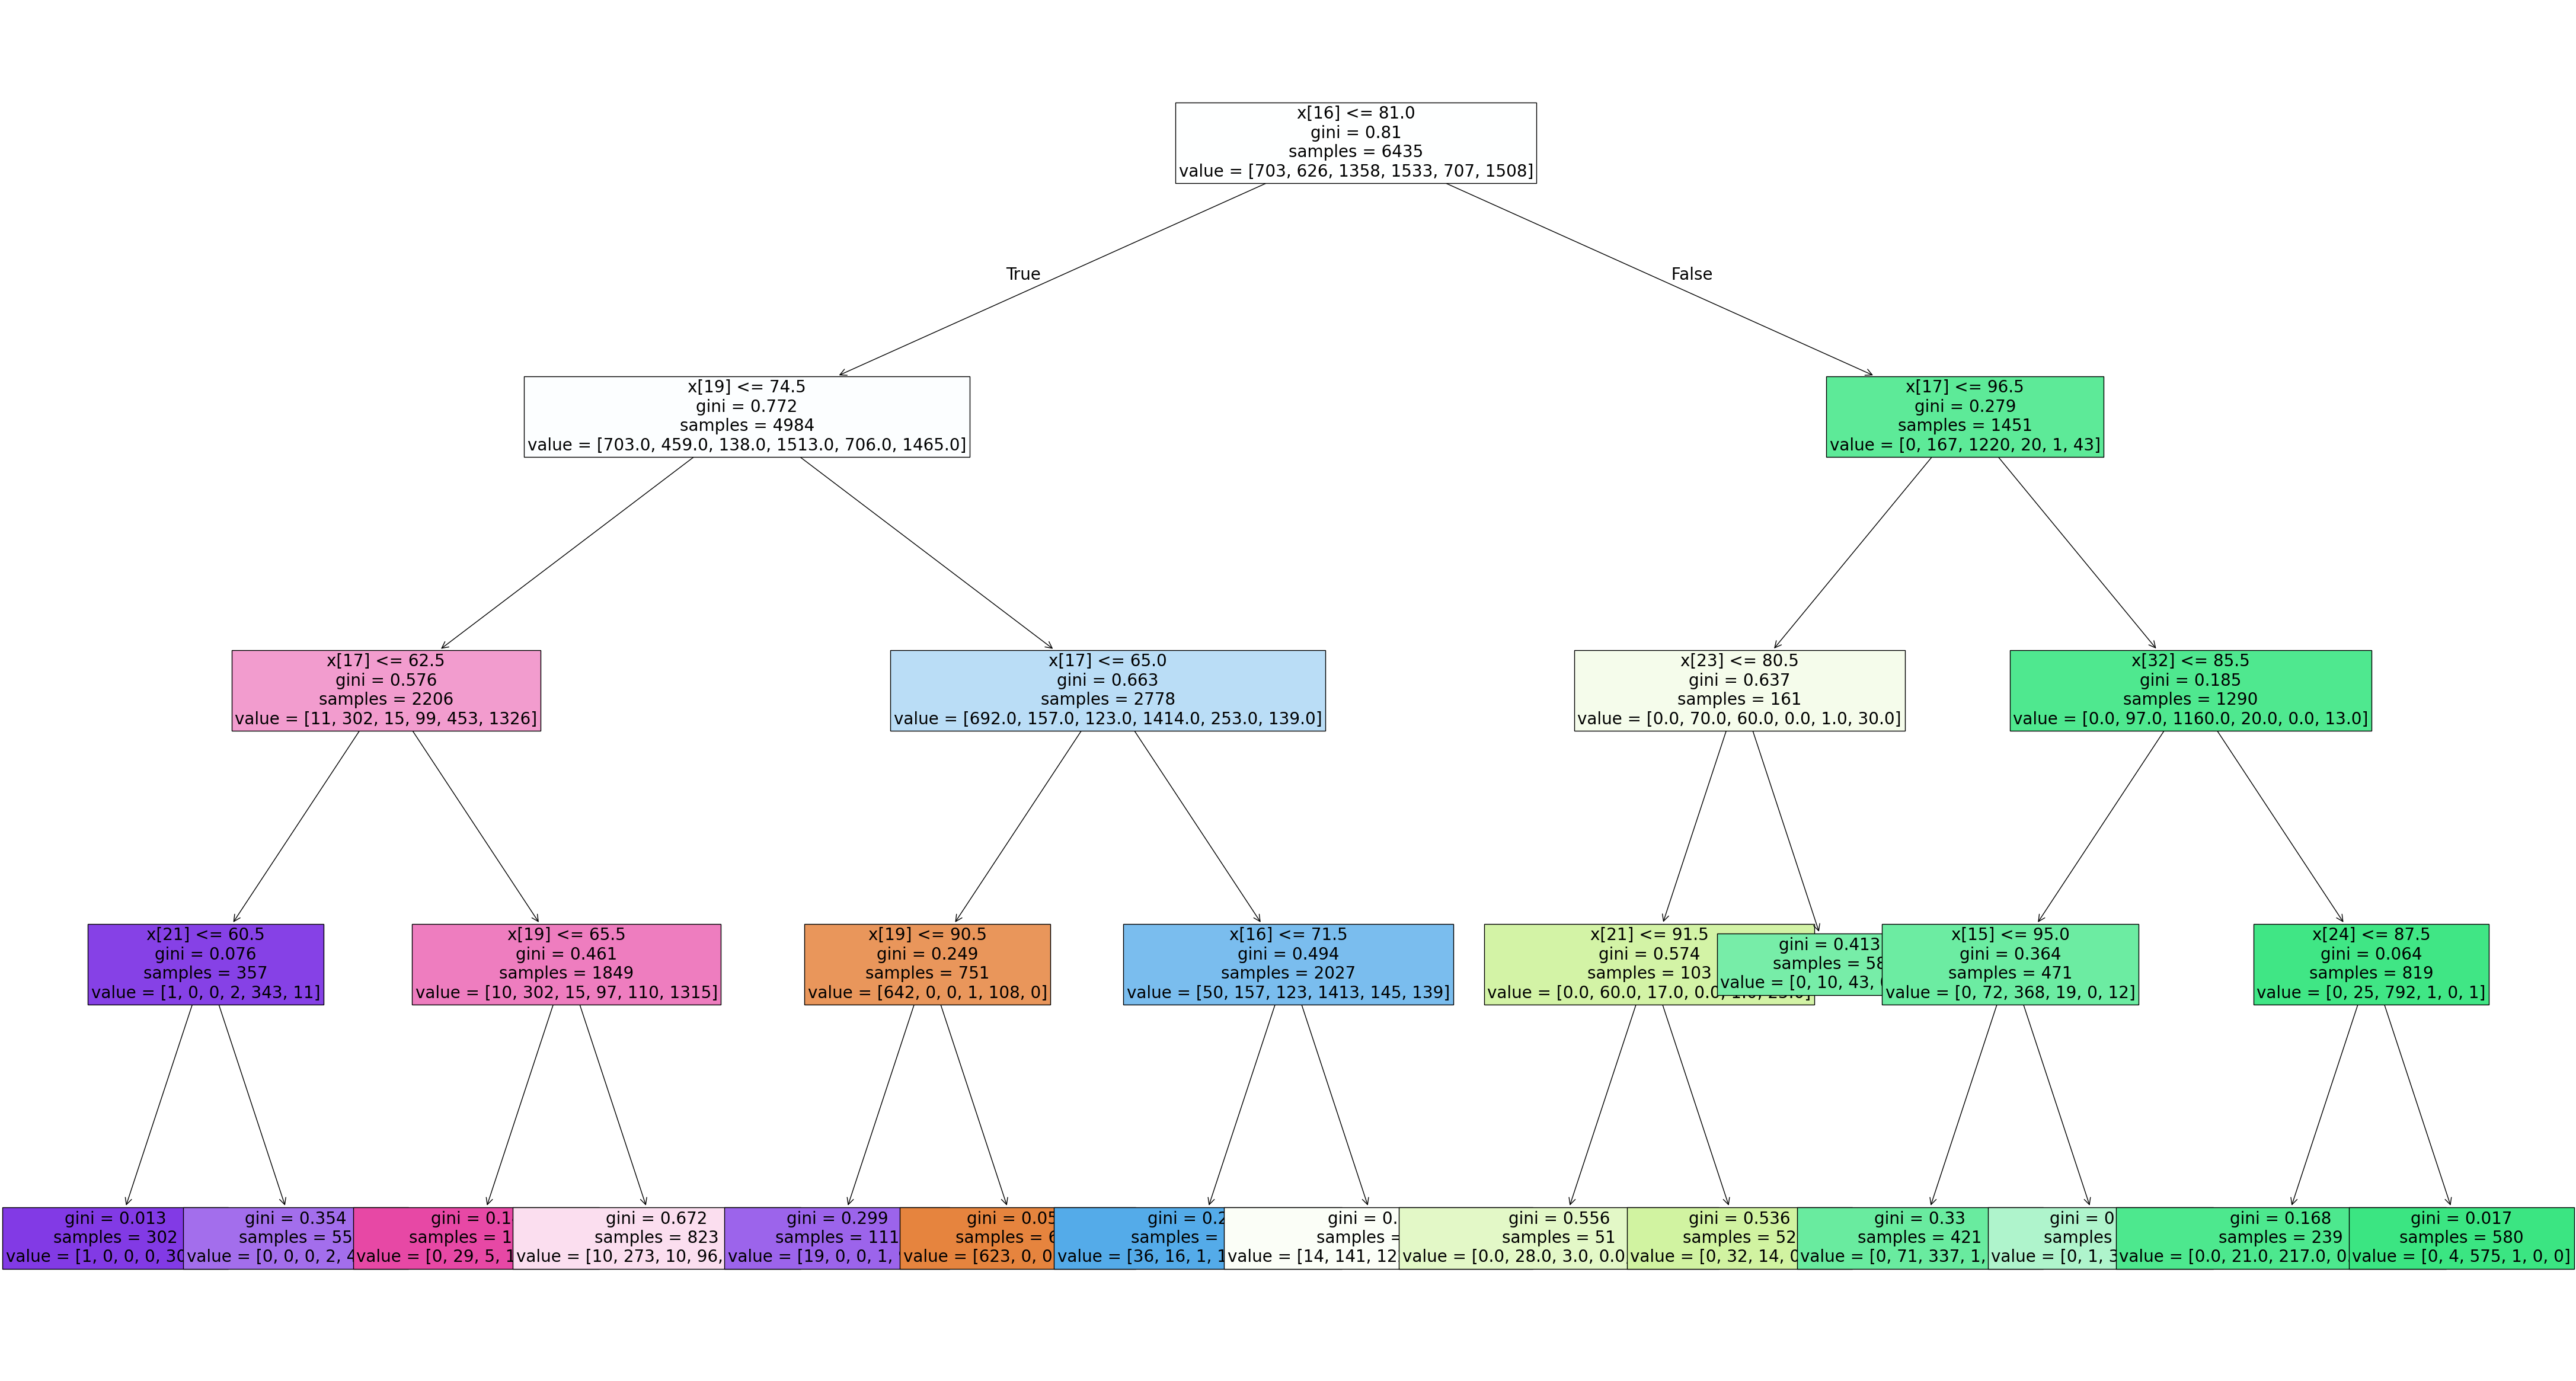

In [18]:
plt.figure(figsize=(55,30))
plot_tree(best_tree,filled= True, fontsize=20)
plt.show()

In [20]:
best_tree.feature_importances_


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00242946, 0.35622852, 0.32804567, 0.        , 0.30031661,
       0.        , 0.00195442, 0.        , 0.00577412, 0.00067921,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00457201, 0.        , 0.        ,
       0.        ])

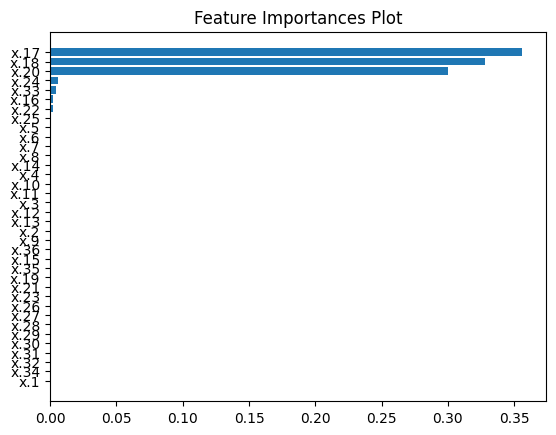

In [22]:
df_imp= pd.DataFrame({'feature': list(X.columns),
               'importance':best_tree.feature_importances_})
df_imp.sort_values('importance', inplace=True)
plt.barh(df_imp['feature'], df_imp['importance'])
plt.title("Feature Importances Plot")
plt.show()